In [14]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

d2l.use_svg_display()

# Homework 1 Question 1a

In [ ]:
def MLPScratch(num_inputs, num_outputs, num_hiddens_1, num_hiddens_2, sigma):
        W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens_1) * sigma)
        b1 = nn.Parameter(torch.zeros(num_hiddens_1))
        W2 = nn.Parameter(torch.randn(num_hiddens_1, num_hiddens_2) * sigma)
        b2 = nn.Parameter(torch.zeros(num_hiddens_2))
        W3 = nn.Parameter(torch.randn(num_hiddens_2, num_outputs) * sigma)
        b3 = nn.Parameter(torch.zeros(num_outputs))
        
        model = nn.Sequential(nn.Flatten(),
                              nn.LazyLinear(num_outputs),
                              nn.ReLU(), 
                              nn.LazyLinear(num_hiddens_1),
                              nn.ReLU(),
                              nn.LazyLinear(num_hiddens_2))
        return model

In [73]:
def train(net, train_iter, test_iter, num_epochs, loss, trainer):
    animator = d2l.Animator(xlabel='epoch', xlim=[0, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)  # train_loss, train_acc, num_examples
        for i, (X, y) in enumerate(train_iter):
            net.train()
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            train_loss = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % 50 == 0:
                animator.add(epoch + i / len(train_iter),
                             (train_loss, train_acc, None))

        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch+1, (None, None, test_acc))
    print(f'train loss {train_loss:.3f}')
    print(f'train acc {train_acc:.3f}')
    print(f'test acc {test_acc:.3f}')


train loss 0.436
train acc 0.843
test acc 0.825


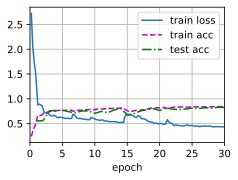

In [74]:
loss = nn.CrossEntropyLoss()
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

# Code was taken from an example in chapter 12 of the textbook
lr, num_epochs = 0.3, 30
net = MLPScratch(784,10,256, 125, 0.01) # num_inputs, num_outputs, num_hiddens_1, num_hiddens_2, sigma
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train(net, train_iter, test_iter, num_epochs, loss, trainer)

# Homework 1 Question 1b

train loss 2.325
train acc 0.231
test acc 0.284


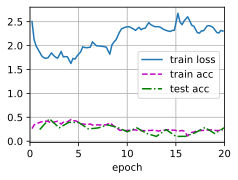

In [77]:
loss = nn.CrossEntropyLoss()
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)
lr, num_epochs = 0.3, 20
weight_decay= 0.1 # needs to be between 0 and 0.1
net= MLPScratch(784,10,256, 125, 0.01) # num_inputs, num_outputs, num_hiddens_1, num_hiddens_2, sigma
trainer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=weight_decay)
train(net, train_iter, test_iter, num_epochs, loss, trainer)

# Homework 1 Question 1c

In [82]:
def dropout(num_inputs, num_outputs, num_hiddens_1, dropout_1, num_hiddens_2,dropout_2, sigma):
        W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens_1) * sigma)
        b1 = nn.Parameter(torch.zeros(num_hiddens_1))
        W2 = nn.Parameter(torch.randn(num_hiddens_1, num_hiddens_2) * sigma)
        b2 = nn.Parameter(torch.zeros(num_hiddens_2))
        W3 = nn.Parameter(torch.randn(num_hiddens_2, num_outputs) * sigma)
        b3 = nn.Parameter(torch.zeros(num_outputs))
        
        model = nn.Sequential(nn.Flatten(),
                              nn.LazyLinear(num_outputs),
                              nn.ReLU(), 
                              nn.Dropout(dropout_1),
                              nn.LazyLinear(num_hiddens_1),
                              nn.ReLU(),
                              nn.Dropout(dropout_2),
                              nn.LazyLinear(num_hiddens_2))
        return model

train loss 1.260
train acc 0.516
test acc 0.606


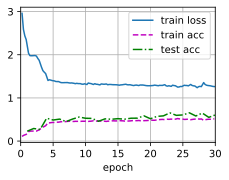

In [83]:
loss = nn.CrossEntropyLoss()
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

# Code was taken from an example in chapter 12 of the textbook
lr, num_epochs = 0.3, 30
net = dropout(784, 10, 256, 0.3, 125, 0.3, 0.01) # num_inputs, num_outputs, num_hiddens_1, dropout_1, num_hiddens_2, dropout_2, sigma
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train(net, train_iter, test_iter, num_epochs, loss, trainer)